# Homomorphic Encryption

LightPHE is a lightweight partially homomorphic encryption library for python. It wraps many partially homomorphic algorithms such as RSA, ElGamal, Exponential ElGamal, Elliptic Curve ElGamal, Paillier, Damgard-Jurik, Okamoto–Uchiyama, Benaloh, Naccache–Stern, Goldwasser–Micali. With LightPHE, you can build homomorphic crypto systems with a couple of lines of code, encrypt & decrypt your data and perform homomorphic operations such as homomorphic addition, homomorphic multiplication, homomorphic xor, regenerate cipher texts, multiplying your cipher text with a known plain constant according to the built algorithm.

## Testing different propperties of algorithms

In [1]:
# pip install lightphe
from lightphe import LightPHE
 
# supported algorithms
algorithms = [
  'RSA',
  'ElGamal',
  'Exponential-ElGamal',
  'Paillier',
  'Damgard-Jurik',
  'Okamoto-Uchiyama',
  'Benaloh',
  'Naccache-Stern',
  'Goldwasser-Micali',
  'EllipticCurve-ElGamal'
]
 
# build a Paillier cryptosystem which is homomorphic
# with respect to the addition
cs = LightPHE(algorithm_name = algorithms[3])
 
# define plaintexts
m1 = 17
m2 = 23
 
# calculate ciphertexts
c1 = cs.encrypt(m1)
c2 = cs.encrypt(m2)
 
# performing homomorphic addition on ciphertexts
assert cs.decrypt(c1 + c2) == m1 + m2
 
# scalar multiplication (increase its value 5%)
k = 5
assert cs.decrypt(k * c1) == k * m1


## Experimenting with vectors and Paillier

Additively homomorphic encryption enables computations on encrypted data without decrypting it, preserving data privacy. In this tutorial, we'll leverage the Paillier cryptosystem to demonstrate essential operations such as encryption, addition, scalar multiplication, and decryption, all while validating the results.

This step-by-step guide includes:

- Setting up the cryptosystem
- Defining plain tensors
- Encrypting tensors
- Performing homomorphic operations
- Decrypting and validating results

Let’s get started by initializing the Paillier cryptosystem and exploring its capabilities.


In [2]:
# build an additively homomorphic cryptosystem
cs = LightPHE(algorithm_name="Paillier")

# define plain tensors
t1 = [1.005, 2.05, 3.5, 4]
t2 = [5, 6.2, 7.002, 8.02]

# encrypt tensors
c1 = cs.encrypt(t1)
c2 = cs.encrypt(t2)

# perform homomorphic addition
c3 = c1 + c2

# perform homomorphic scalar multiplication
k = 5
c5 = k * c1

# decrypt the addition tensor
t3 = cs.decrypt(c3)

# decrypt the scalar multiplied tensor
t5 = cs.decrypt(c5)

# data validations
threshold = 0.5
for i in range(0, len(t1)):
   assert abs((t1[i] + t2[i]) - t3[i]) < threshold
   assert abs((t1[i] * k) - t5[i]) < threshold

## Calculate the square eucledian distance using Paillier

In [3]:
import numpy as np
print(np.random.randint(1, 10, 256)) # generate a random vector with length 256

[4 9 6 6 7 4 1 7 7 6 7 1 8 4 8 6 9 2 2 6 5 8 6 5 4 4 3 3 2 9 1 8 7 6 4 4 3
 3 9 2 3 6 7 1 4 1 2 8 6 7 4 7 9 9 8 1 1 8 2 1 5 9 1 6 9 9 3 1 9 6 3 2 9 6
 1 6 4 9 1 4 2 4 7 7 8 6 7 5 3 6 5 9 5 5 7 7 3 2 3 5 8 1 3 5 9 8 6 2 1 5 8
 6 1 9 5 8 9 9 5 6 2 3 7 2 2 5 3 7 6 5 2 5 4 5 6 5 3 8 1 2 2 1 4 5 5 2 4 4
 8 4 3 1 5 1 3 3 1 6 2 3 7 8 9 6 1 9 6 7 3 6 3 7 9 1 7 5 8 5 2 6 6 8 2 5 1
 4 2 6 3 6 7 5 1 5 1 2 7 3 4 5 2 5 2 1 5 8 4 7 4 2 4 5 1 5 8 2 6 1 2 8 4 5
 1 6 4 5 9 1 9 2 4 8 7 1 8 1 4 8 7 8 1 5 5 4 5 3 8 5 4 2 6 3 6 9 2 7]


In [4]:
cs = LightPHE(algorithm_name='Paillier')

# Client-side:
X = np.random.randint(1, 10, 256)  # Client's feature vector
enc_X = [cs.encrypt(int(x)) for x in X]  # Client encrypts each element of X

# Client computes Enc(S1 = sum(x_i^2)) and sends it to the server
S1 = np.sum(X ** 2).item()  # Sum of squares of X
enc_S1 = cs.encrypt(S1)

# Server-side: Define the vector Y (held unencrypted by the server)
Y = np.random.randint(1, 10, 256)  # Server's feature vector

# Step 1: Server computes S2 = sum(y_i^2)
S2 = np.sum(Y ** 2).item()  # Sum of squares of Y (unencrypted, direct calculation -> server has access)
enc_S2 = cs.encrypt(S2)

# Step 2: Server computes the cross term Enc(S3) using homomorphic properties
enc_S3 = cs.encrypt(0)  # Initialize as 0 in encrypted form
for i in range(len(X)):
    cross_term = -2 * Y[i]  # Calculate -2 * y_i
    enc_S3 += enc_X[i] * int(cross_term)  # Convert cross_term to Python int

# Step 3: Combine Enc(S1), Enc(S3), and S2 to get Enc(D(X, Y)^2)
enc_D_squared = enc_S1 + enc_S3 + enc_S2

# For verification purposes, decrypt the result (in practice, this would remain encrypted on server side)
D_squared = cs.decrypt(enc_D_squared)
print("Encrypted squared distance (decrypted for verification):", D_squared)


Encrypted squared distance (decrypted for verification): 3235


## Script to verify Result

In [5]:
# Calculate squared Euclidean distance
squared_distance = np.sum((X - Y) ** 2)

print("Squared Euclidean Distance:", squared_distance)


Squared Euclidean Distance: 3235


## Implementing time measure for different vector lengths (using Paillier)

Vector length: 2, Time taken: 0.104614 seconds, Squared Distance: 18
Vector length: 4, Time taken: 0.140774 seconds, Squared Distance: 17
Vector length: 8, Time taken: 0.212621 seconds, Squared Distance: 73
Vector length: 16, Time taken: 0.354567 seconds, Squared Distance: 186
Vector length: 32, Time taken: 0.639967 seconds, Squared Distance: 425
Vector length: 64, Time taken: 1.214712 seconds, Squared Distance: 694
Vector length: 128, Time taken: 2.360554 seconds, Squared Distance: 1801
Vector length: 256, Time taken: 4.630323 seconds, Squared Distance: 3458
Vector length: 512, Time taken: 9.199015 seconds, Squared Distance: 7038
Vector length: 1024, Time taken: 18.253667 seconds, Squared Distance: 14398
Vector length: 2048, Time taken: 37.292511 seconds, Squared Distance: 27246


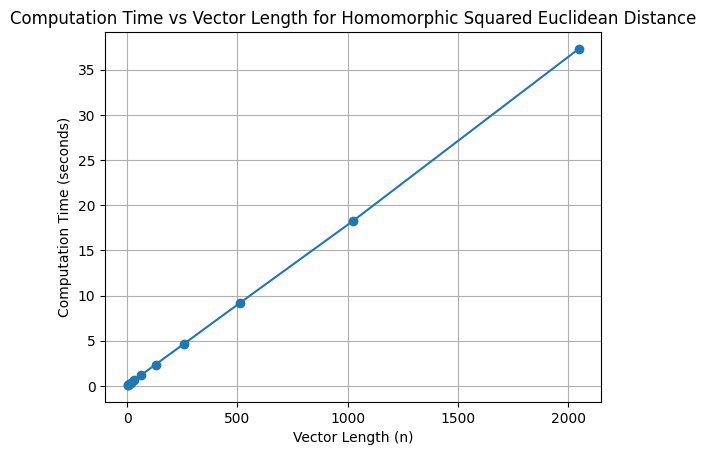

In [6]:
import time
import matplotlib.pyplot as plt

# Initialize LightPHE with Paillier encryption
cs = LightPHE(algorithm_name='Paillier')

# Define the vector lengths to test
vector_lengths = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
times = []

# Function to calculate squared Euclidean distance using homomorphic encryption
def homomorphic_squared_euclidean_distance(cs, X, Y):
    # Client-side: Encrypt the vector X
    enc_X = [cs.encrypt(int(x)) for x in X]

    # Client computes Enc(S1 = sum(x_i^2)) and sends it to the server
    S1 = np.sum(X ** 2).item()
    enc_S1 = cs.encrypt(S1)

    # Server computes S2 = sum(y_i^2)
    S2 = np.sum(Y ** 2).item()
    enc_S2 = cs.encrypt(S2)

    # Server computes the cross term Enc(S3)
    enc_S3 = cs.encrypt(0)  # Initialize as 0 in encrypted form
    for i in range(len(X)):
        cross_term = -2 * Y[i]
        enc_S3 += enc_X[i] * int(cross_term)  # Homomorphic multiplication with encrypted x_i

    # Combine Enc(S1), Enc(S3), and Enc(S2) to get Enc(D(X, Y)^2)
    enc_D_squared = enc_S1 + enc_S3 + enc_S2
    return enc_D_squared

# Measure time for each vector length
for n in vector_lengths:
    # Generate random vectors X and Y of length n
    X = np.random.randint(1, 10, n)
    Y = np.random.randint(1, 10, n)

    # Start timing
    start_time = time.time()
    
    # Compute homomorphic squared Euclidean distance
    enc_D_squared = homomorphic_squared_euclidean_distance(cs, X, Y)
    
    # Decrypt the result to verify (only for testing; in real use, keep encrypted)
    D_squared = cs.decrypt(enc_D_squared)
    
    # End timing
    end_time = time.time()
    
    # Calculate elapsed time and store it
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

    print(f"Vector length: {n}, Time taken: {elapsed_time:.6f} seconds, Squared Distance: {D_squared}")

# Plotting the results
plt.plot(vector_lengths, times, marker='o')
plt.xlabel("Vector Length (n)")
plt.ylabel("Computation Time (seconds)")
plt.title("Homomorphic Squared Euclidean Distance for random vectors using Paillier")
plt.grid(True)
plt.show()


## Comparison of different algorithms and length

Testing algorithm: Exponential-ElGamal
Algorithm: Exponential-ElGamal, Vector length: 2, Time taken: 0.010564 seconds
Algorithm: Exponential-ElGamal, Vector length: 4, Time taken: 0.014371 seconds
Algorithm: Exponential-ElGamal, Vector length: 8, Time taken: 0.023842 seconds
Algorithm: Exponential-ElGamal, Vector length: 16, Time taken: 0.039645 seconds
Algorithm: Exponential-ElGamal, Vector length: 32, Time taken: 0.071919 seconds
Algorithm: Exponential-ElGamal, Vector length: 64, Time taken: 0.137427 seconds
Algorithm: Exponential-ElGamal, Vector length: 128, Time taken: 0.280677 seconds
Algorithm: Exponential-ElGamal, Vector length: 256, Time taken: 0.555844 seconds
Algorithm: Exponential-ElGamal, Vector length: 512, Time taken: 1.116261 seconds
Algorithm: Exponential-ElGamal, Vector length: 1024, Time taken: 2.263621 seconds
Algorithm: Exponential-ElGamal, Vector length: 2048, Time taken: 4.592657 seconds
Testing algorithm: Paillier
Algorithm: Paillier, Vector length: 2, Time taken

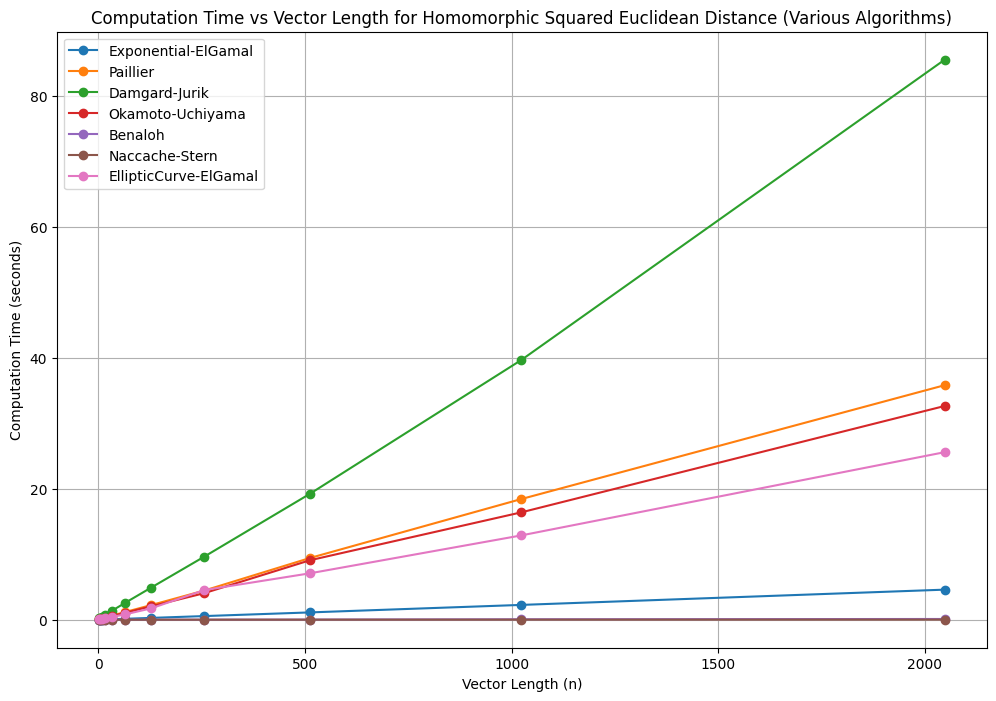

In [7]:
import time
import matplotlib.pyplot as plt

# Define the vector lengths to test
vector_lengths = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

# Define the algorithms to test
algorithms = [
    'Exponential-ElGamal',
    'Paillier',
    'Damgard-Jurik',
    'Okamoto-Uchiyama',
    'Benaloh',
    'Naccache-Stern',
    'EllipticCurve-ElGamal'
]

# Dictionary to hold times for each algorithm and vector length
results = {alg: [] for alg in algorithms}

# Function to calculate squared Euclidean distance using homomorphic encryption
def homomorphic_squared_euclidean_distance(cs, X, Y):
    # Client-side: Encrypt the vector X
    enc_X = [cs.encrypt(int(x)) for x in X]

    # Client computes Enc(S1 = sum(x_i^2)) and sends it to the server
    S1 = np.sum(X ** 2).item()
    enc_S1 = cs.encrypt(S1)

    # Server computes S2 = sum(y_i^2)
    S2 = np.sum(Y ** 2).item()
    enc_S2 = cs.encrypt(S2)

    # Server computes the cross term Enc(S3)
    enc_S3 = cs.encrypt(0)  # Initialize as 0 in encrypted form
    for i in range(len(X)):
        cross_term = -2 * Y[i]
        enc_S3 += enc_X[i] * int(cross_term)  # Homomorphic multiplication with encrypted x_i

    # Combine Enc(S1), Enc(S3), and Enc(S2) to get Enc(D(X, Y)^2)
    enc_D_squared = enc_S1 + enc_S3 + enc_S2
    return enc_D_squared

# Run the test for each algorithm and vector length
for alg in algorithms:
    # Initialize the encryption scheme for the algorithm
    cs = LightPHE(algorithm_name=alg)
    print(f"Testing algorithm: {alg}")

    for n in vector_lengths:
        # Generate random vectors X and Y of length n
        X = np.random.randint(1, 10, n)
        Y = np.random.randint(1, 10, n)

        # Start timing
        start_time = time.time()
        
        # Compute homomorphic squared Euclidean distance
        enc_D_squared = homomorphic_squared_euclidean_distance(cs, X, Y)
        
        # Decrypt the result to verify (only for testing; in real use, keep encrypted)
        D_squared = cs.decrypt(enc_D_squared)
        
        # End timing
        end_time = time.time()
        
        # Calculate elapsed time and store it
        elapsed_time = end_time - start_time
        results[alg].append(elapsed_time)

        print(f"Algorithm: {alg}, Vector length: {n}, Time taken: {elapsed_time:.6f} seconds")

# Plotting the results
plt.figure(figsize=(12, 8))

# For each algorithm, plot the times across vector lengths
for alg in algorithms:
    plt.plot(vector_lengths, results[alg], marker='o', label=alg)

plt.xlabel("Vector Length (n)")
plt.ylabel("Computation Time (seconds)")
plt.title("Homomorphic Squared Euclidean Distance for random vectors (Various Algorithms)")
plt.legend()
plt.grid(True)
plt.show()


## Squared Eucledian Distance for different algorithms using real-life vectors

In [8]:
import time
import matplotlib.pyplot as plt
import numpy as np
import json
import random

# Load the data from "new_emb.txt"
with open('emb.txt', 'r') as f:
    data = f.read()
ALL_DICT_DATA = json.loads(data)

labels = list(ALL_DICT_DATA.keys())

# Define the vector lengths to test (truncating vectors to these lengths)
vector_lengths = [32, 64, 128, 192]  # Adjust according to your vector's actual length

# Define the algorithms to test
algorithms = [
    'Exponential-ElGamal',
    'Paillier',
    'Damgard-Jurik',
    'Okamoto-Uchiyama',
    'Benaloh',
    'Naccache-Stern'
]

# Dictionary to hold average times for each algorithm and vector length
results = {alg: [] for alg in algorithms}

# Function to process the vector (e.g., convert to integer representation)
def process_vector(vec):
    # Multiply each element by CONVERSION_FACTOR (256) and convert to int
    CONVERSION_FACTOR = 1 << 8  # 256
    return [int(v * CONVERSION_FACTOR) for v in vec]

# Function to calculate squared Euclidean distance using homomorphic encryption
def homomorphic_squared_euclidean_distance(cs, X, Y):
    # Client-side: Encrypt the vector X
    enc_X = [cs.encrypt(int(x)) for x in X]

    # Client computes Enc(S1 = sum(x_i^2)) and sends it to the server
    S1 = np.sum(np.array(X) ** 2).item()
    enc_S1 = cs.encrypt(S1)

    # Server computes S2 = sum(y_i^2)
    S2 = np.sum(np.array(Y) ** 2).item()
    enc_S2 = cs.encrypt(S2)

    # Server computes the cross term Enc(S3)
    enc_S3 = cs.encrypt(0)  # Initialize as 0 in encrypted form
    for i in range(len(X)):
        cross_term = -2 * Y[i]
        enc_S3 += enc_X[i] * int(cross_term)  # Homomorphic multiplication with encrypted x_i

    # Combine Enc(S1), Enc(S3), and Enc(S2) to get Enc(D(X, Y)^2)
    enc_D_squared = enc_S1 + enc_S3 + enc_S2
    return enc_D_squared

# Number of pairs to test per algorithm per vector length
num_pairs = 5  # Adjusted to 30 for statistical relevance

# Run the test for each algorithm and vector length
for alg in algorithms:
    # Initialize the encryption scheme for the algorithm
    cs = LightPHE(algorithm_name=alg)
    print(f"Testing algorithm: {alg}")

    for n in vector_lengths:
        times = []

        for _ in range(num_pairs):
            # Randomly select two different labels
            label_X, label_Y = random.sample(labels, 2)

            # Get the vectors and truncate to length n
            X_raw = ALL_DICT_DATA[label_X][:n]
            Y_raw = ALL_DICT_DATA[label_Y][:n]

            # Process the vectors to convert to integer representation
            X = process_vector(X_raw)
            Y = process_vector(Y_raw)

            # Start timing
            start_time = time.time()
            
            # Compute homomorphic squared Euclidean distance
            enc_D_squared = homomorphic_squared_euclidean_distance(cs, X, Y)
            
            # Decrypt the result to verify (only for testing; in real use, keep encrypted)
            D_squared = cs.decrypt(enc_D_squared)
            
            # End timing
            end_time = time.time()
            
            # Calculate elapsed time and store it
            elapsed_time = end_time - start_time
            times.append(elapsed_time)

        # Compute average time for this vector length
        avg_time = sum(times) / num_pairs
        results[alg].append(avg_time)
        print(f"Algorithm: {alg}, Vector length: {n}, Average Time: {avg_time:.6f} seconds")

# Plotting the results
plt.figure(figsize=(12, 8))

# For each algorithm, plot the average times across vector lengths
for alg in algorithms:
    plt.plot(vector_lengths, results[alg], marker='o', label=alg)

plt.xlabel("Vector Length (n)")
plt.ylabel("Average Computation Time (seconds)")
plt.title("Homomorphic Squared Euclidean Distance for biometric sample vectors (Various Algorithms)")
plt.legend()
plt.grid(True)
plt.show()


Testing algorithm: Exponential-ElGamal
Algorithm: Exponential-ElGamal, Vector length: 32, Average Time: 23.585108 seconds
Algorithm: Exponential-ElGamal, Vector length: 64, Average Time: 42.562275 seconds


KeyboardInterrupt: 

Display the vectors

In [ ]:
import json

# Load the data from "emb.txt"
with open('emb.txt', 'r') as f:
    data = f.read()
ALL_DICT_DATA = json.loads(data)

# Function to process the vector (apply the conversion factor)
def process_vector(vec):
    CONVERSION_FACTOR = 1 << 8  # 256
    return [int(v * CONVERSION_FACTOR) for v in vec]

# Select a random vector from the dataset
label = list(ALL_DICT_DATA.keys())[0]  # Example: taking the first label
original_vector = ALL_DICT_DATA[label]  # Get the corresponding vector

# Process the vector using the conversion factor
processed_vector = process_vector(original_vector)

# Print the original and processed vectors
print("Original vector:", original_vector[:10])  # Print the first 10 elements for brevity
print("Processed vector:", processed_vector[:10])  # Print the first 10 elements for brevity


In [ ]:
import numpy as np
print(" Random vector: ", np.random.randint(1, 10, 10)) # generate a random vector with length 256

## Hamming Distance using Glodwasser-Micali (Exclusively Homomorphic)

In [ ]:
cs = LightPHE(algorithm_name='Goldwasser-Micali')

# define plaintexts
m1 = 17
m2 = 23
 
# calculate ciphertexts
c1 = cs.encrypt(m1)
c2 = cs.encrypt(m2)

print(cs.decrypt(c1 ^ c2) == m1 ^ m2)

In [ ]:
# Initialize LightPHE with Goldwasser-Micali encryption
cs = LightPHE(algorithm_name='Goldwasser-Micali')

# Client-side: Encrypt the vector X
X = [1, 1, 1]
enc_X = [cs.encrypt(int(x)) for x in X]

# Server-Side: Encrypt the vector Y
Y = [0, 0, 0]
enc_Y = [cs.encrypt(int(y)) for y in Y]

# Server computes the cross term Enc(S3)
enc_S2 = 0  # Initialize as 0 in encrypted form
for i in range(len(X)):
    enc_S2 += cs.decrypt(enc_X[i] ^ enc_Y[i]) # sum up XOR between two vectors 

print(enc_S2)


In [ ]:
# Initialize LightPHE with Goldwasser-Micali encryption
cs = LightPHE(algorithm_name='Goldwasser-Micali')

# Define the vector lengths to test
vector_lengths = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
times = []

# Function to calculate squared Euclidean distance using homomorphic encryption
def homomorphic_hamming_distance(cs, X, Y):
    # Client-side: Encrypt the vector X
    enc_X = [cs.encrypt(int(x)) for x in X]

    # Server-Side: Encrypt the vector Y
    enc_Y = [cs.encrypt(int(y)) for y in Y]

    # Server computes the cross term Enc(S3)
    enc_S2 = cs.encrypt(0)  # Initialize as 0 in encrypted form
    for i in range(len(X)):
        enc_S3 += enc_X[i] ^ enc_Y[i] # sum up XOR between two vectors 
        

    # Combine Enc(S1), Enc(S3), and Enc(S2) to get Enc(D(X, Y)^2)
    enc_D_squared = enc_S1 + enc_S3 + enc_S2
    return enc_D_squared

# Measure time for each vector length
for n in vector_lengths:
    # Generate random vectors X and Y of length n
    X = np.random.randint(0, 1, n)
    Y = np.random.randint(0, 1, n)

    # Start timing
    start_time = time.time()
    
    # Compute homomorphic squared Euclidean distance
    enc_D_squared = homomorphic_squared_euclidean_distance(cs, X, Y)
    
    # Decrypt the result to verify (only for testing; in real use, keep encrypted)
    D_squared = cs.decrypt(enc_D_squared)
    
    # End timing
    end_time = time.time()
    
    # Calculate elapsed time and store it
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

    print(f"Vector length: {n}, Time taken: {elapsed_time:.6f} seconds, Squared Distance: {D_squared}")

# Plotting the results
plt.plot(vector_lengths, times, marker='o')
plt.xlabel("Vector Length (n)")
plt.ylabel("Computation Time (seconds)")
plt.title("Computation Time vs Vector Length for Homomorphic Squared Euclidean Distance")
plt.grid(True)
plt.show()
